In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### distribution of bmi

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


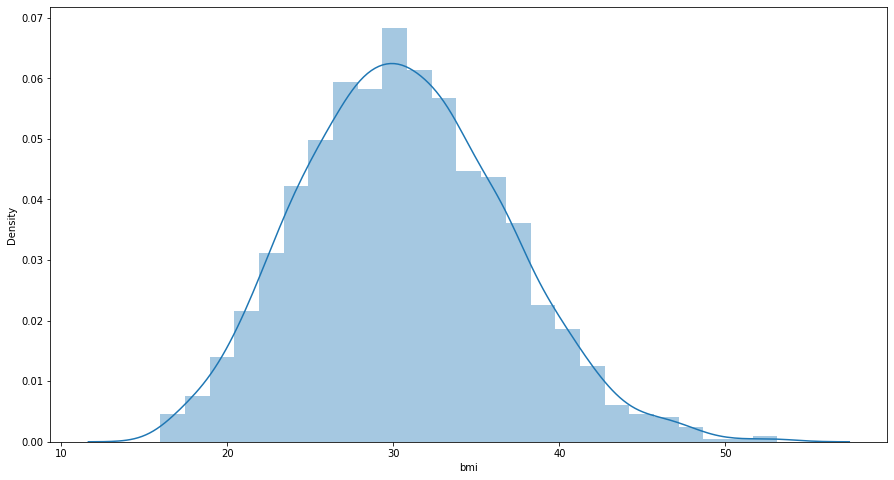

In [6]:
plt.figure(figsize=(15,8))
sns.distplot(data['bmi'])

#### smoker - charges

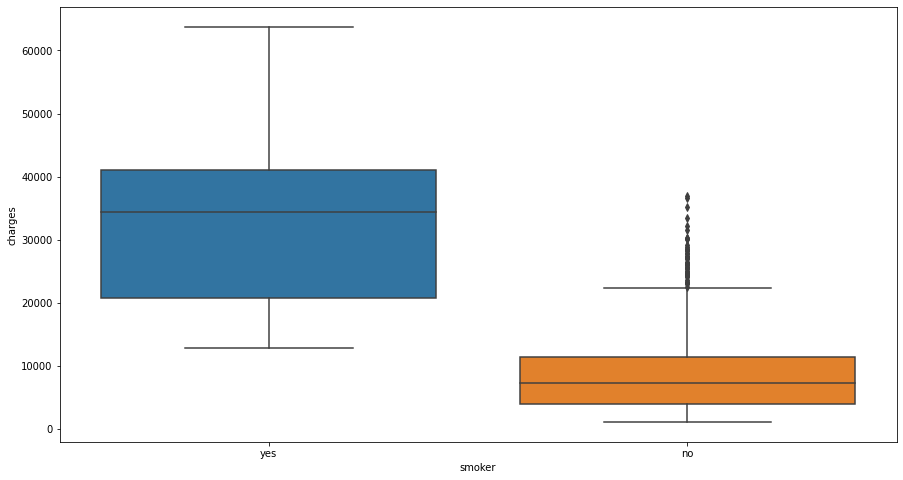

In [7]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='smoker', y='charges')
plt.show()

#### smoker - region

Text(0.5, 1.0, 'Smoker vs Region')

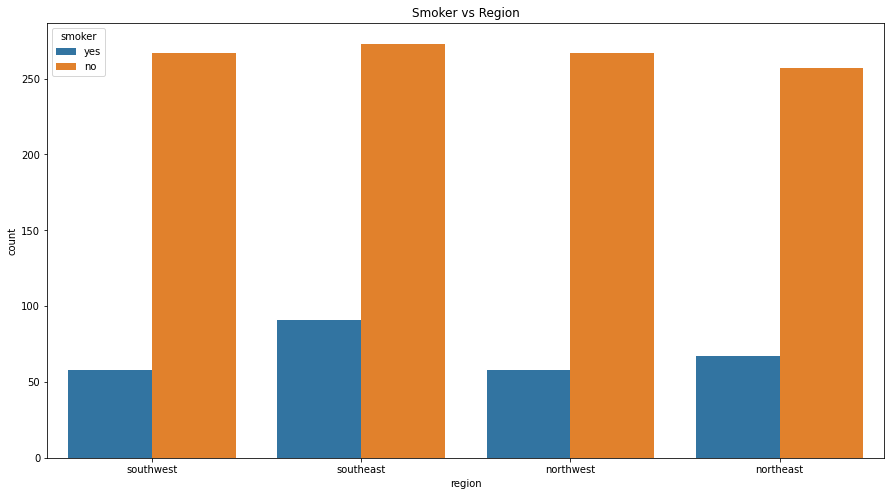

In [8]:
plt.figure(figsize=(15,8))
sns.countplot(x='region',hue='smoker',data=data)
plt.title("Smoker vs Region")

#### sex - bmi

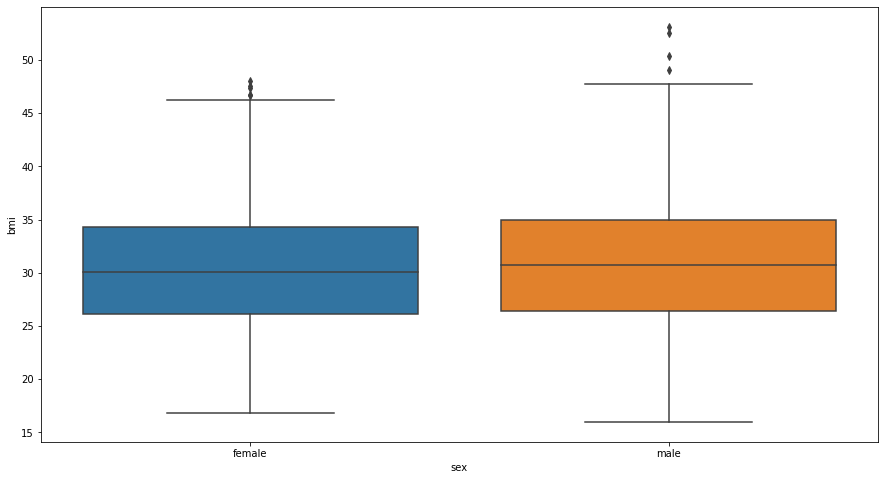

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='sex', y='bmi')
plt.show()

#### region - children

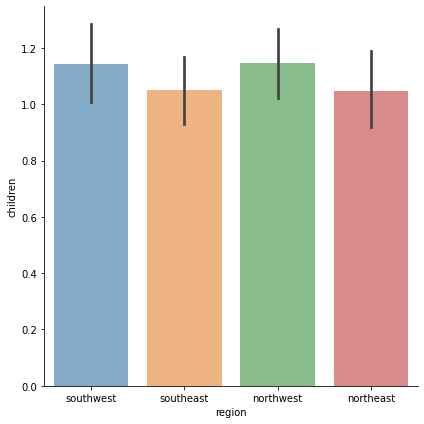

In [10]:
sns.catplot(data=data, kind="bar", x="region", y="children", alpha=.6, height=6)

#### most children

In [25]:
child = data.groupby("region")["children"].sum()
child

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

#### age - bmi

[]

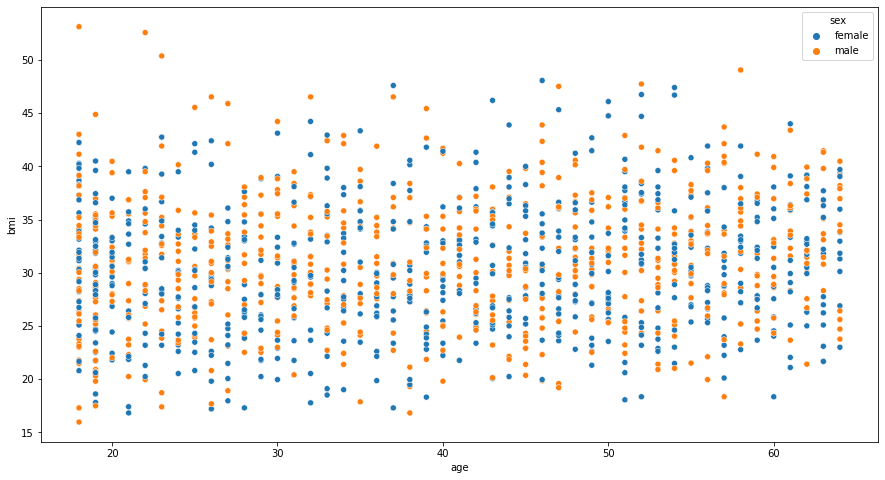

In [12]:

plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x='age', y='bmi', hue='sex')
plt.plot()

#### bmi - children

[]

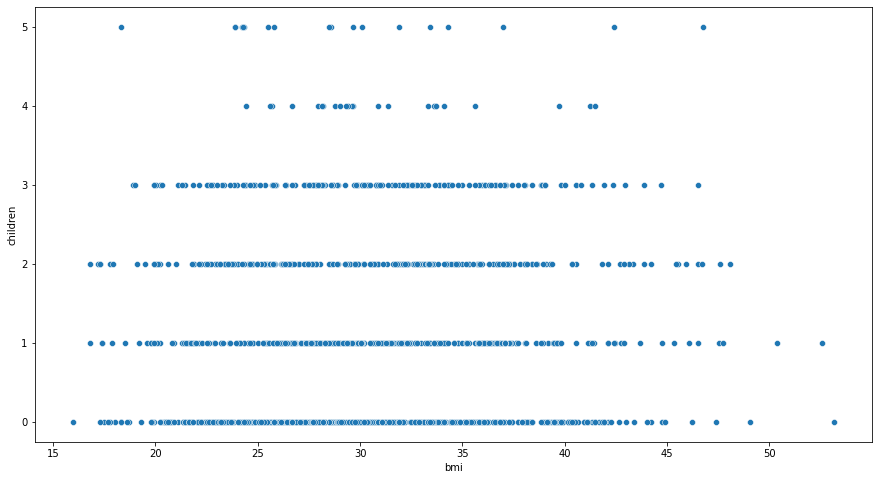

In [13]:

plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x='bmi', y='children')
plt.plot()

#### 3sigma outlier detection

In [14]:
bmi = data['bmi']
bmi.agg([max,min])

max    53.13
min    15.96
Name: bmi, dtype: float64

In [15]:
std = bmi.std()
avg = bmi.mean()
std, avg

(6.098186911679014, 30.66339686098655)

In [28]:
#threeSigmaPlus
tsp = avg + (3 * std)
#threeSigmaMinus
tsm = avg - (3 * std)

print('three sigma plus -> ' , tsp)
print('three sigma minus -> ' , tsm)

three sigma plus ->  48.95795759602359
three sigma minus ->  12.368836125949507


In [17]:
outliers = []
for i in range(0,len(bmi)):
  if bmi[i] > tsp or bmi[i] < tsm:
    outliers.append(bmi[i])

outliers

[49.06, 50.38, 52.58, 53.13]

#### bmi - charges

[]

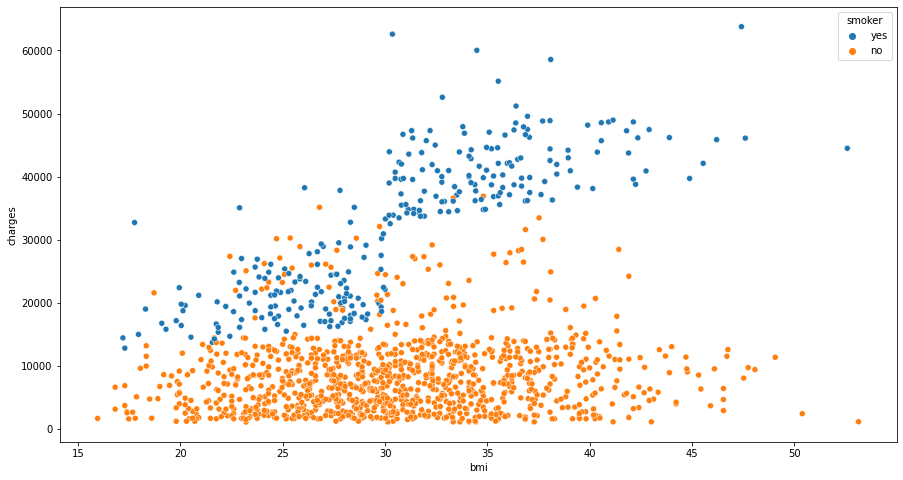

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker')
plt.plot()

#### region - smoker - bmi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


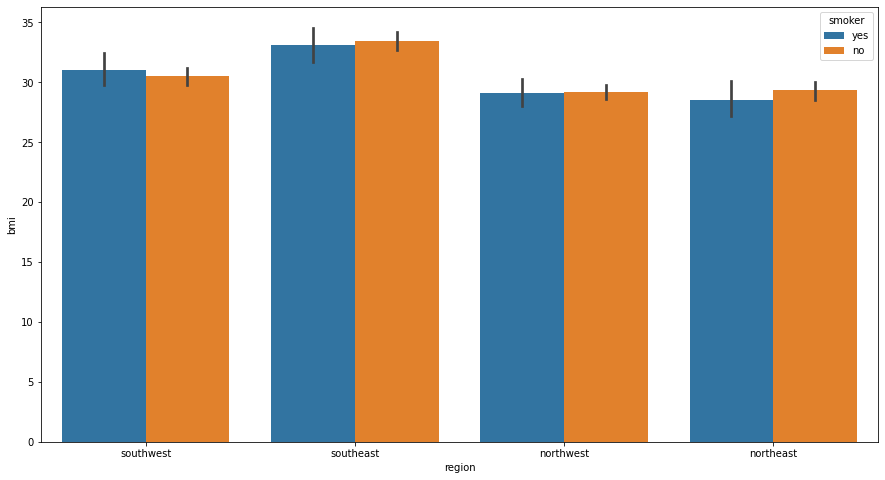

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(data['region'], data['bmi'], hue = 'smoker', data=data)
plt.show()

### one-hot encoding

In [33]:
encoded = pd.get_dummies(data = data, columns=["sex", "smoker", "region"])
encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### outlier detection

In [50]:
bmi = encoded['bmi'].sort_values()

q1 = np.percentile(bmi, 25, interpolation = 'midpoint') 
q2 = np.percentile(bmi, 50, interpolation = 'midpoint') 
q3 = np.percentile(bmi, 75, interpolation = 'midpoint') 

IQR = q3 - q1

q1,q2,q3, IQR

(26.302500000000002, 30.4, 34.6875, 8.384999999999998)

In [52]:
lowerBound = q1 - 1.5 * IQR
upperBound = q3 + 1.5 * IQR

print('Lower Bound -> ', lowerBound)
print('Upper Bound -> ', upperBound)


Lower Bound ->  13.725000000000005
Upper Bound ->  47.265


In [53]:
outliers = []
for i in bmi:
  if i > upperBound or i < lowerBound:
    outliers.append(i)

outliers

[47.41, 47.52, 47.6, 47.74, 48.07, 49.06, 50.38, 52.58, 53.13]

In [58]:
encoded.drop(encoded[(encoded['bmi'] >47.20)].index, inplace=True)

encoded.agg([max])

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
max,64,46.75,5,62592.87309,1,1,1,1,1,1,1,1


In [59]:
from sklearn.model_selection import train_test_split

X = encoded.drop(["charges"], axis=1)
y = encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [61]:
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in [X_train, X_test, y_train, y_test]:
  scaler.fit_transform(i)
  print(scaler.mean_)

[39.12473118 30.57822043  1.11827957  0.49354839  0.50645161  0.79784946
  0.20215054  0.25698925  0.24408602  0.2655914   0.23333333]
[39.38847118 30.4420802   1.04511278  0.50125313  0.49874687  0.79197995
  0.20802005  0.21052632  0.24561404  0.27568922  0.26817043]
[13264.96910632]
[13089.64858564]
